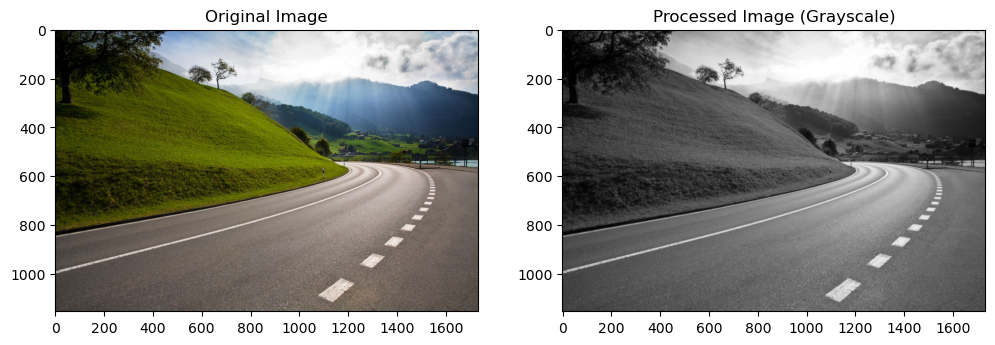

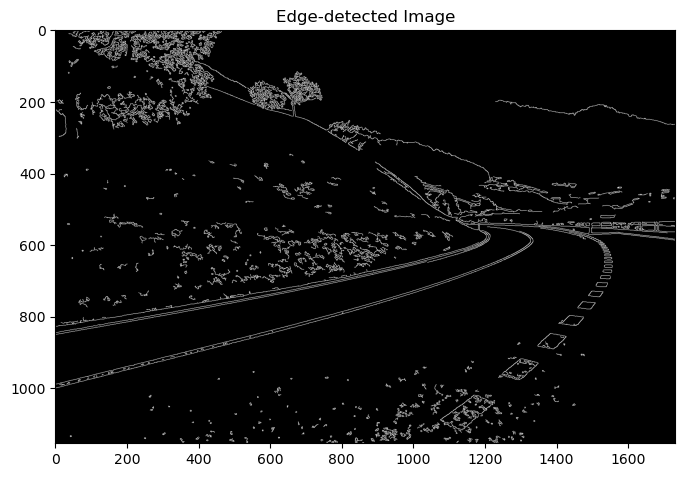

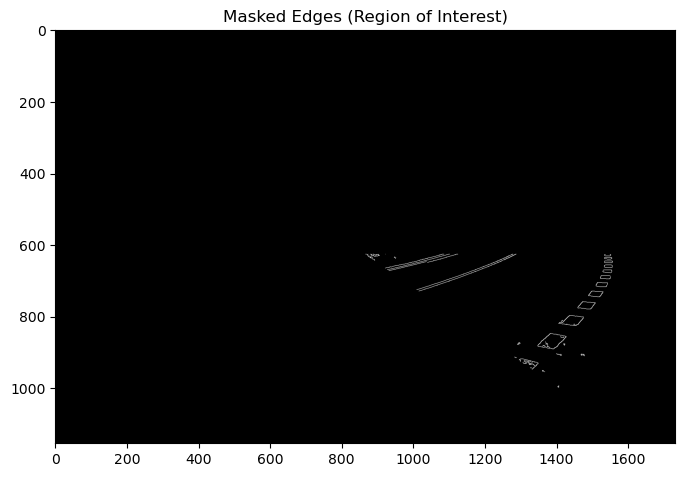

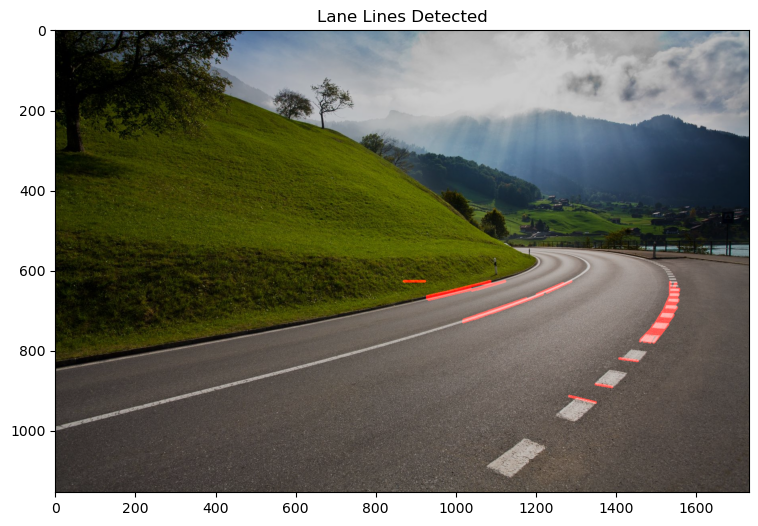

In [ ]:
!pip install numpy opencv-python matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = 'road_image.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB (OpenCV uses BGR by default)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Display the original and processed image
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(blur_gray, cmap='gray')
plt.title('Processed Image (Grayscale)')
plt.show()

# Define parameters for Canny edge detection
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='Greys_r')
plt.title('Edge-detected Image')
plt.show()

# Define a region of interest polygon (triangle for simplicity)
mask = np.zeros_like(edges)
ignore_mask_color = 255

# Define vertices of the triangular ROI
imshape = image.shape
vertices = np.array([[(1000000, imshape[0]), (imshape[1] // 2, imshape[0] // 2 + 50), (imshape[1] - 100, imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Display the masked edges
plt.figure(figsize=(8, 6))
plt.imshow(masked_edges, cmap='Greys_r')
plt.title('Masked Edges (Region of Interest)')
plt.show()

# Define Hough transform parameters
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi/180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments

# Run Hough transform on edge-detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Create a blank image to draw lines on
line_image = np.zeros((masked_edges.shape[0], masked_edges.shape[1], 3), dtype=np.uint8)

# Iterate over detected lines and draw them on the blank image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Overlay lines image on original image
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Display the final image with detected lanes
plt.figure(figsize=(12, 6))
plt.imshow(lines_edges)
plt.title('Lane Lines Detected')
plt.show()
